In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv("C:/Users/LAXMI NISHAD/OneDrive/Desktop/Data Science Project - CodSoft/creditcard.csv")

In [3]:
pd.options.display.max_columns=None

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
print('Number of Rows : ',df.shape[0])
print('Number of Columns : ',df.shape[1])

Number of Rows :  284807
Number of Columns :  31


In [7]:
df.duplicated().any()

True

In [8]:
df=df.drop_duplicates()

In [9]:
df.shape

(283726, 31)

<Axes: >

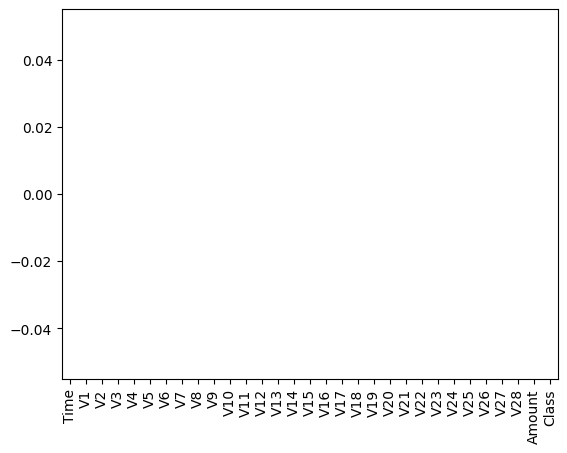

In [10]:
df.isna().sum().plot(kind='bar')

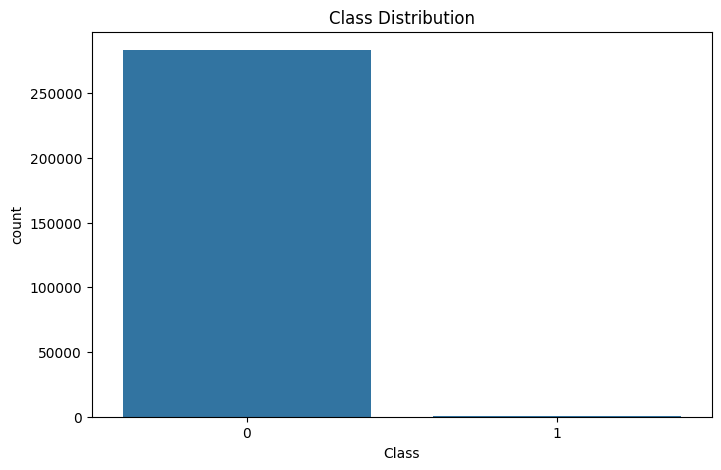

Class
0    283253
1       473
Name: count, dtype: int64

In [11]:
# Class Distribution
plt.figure(figsize=(8,5))
plt.title('Class Distribution')
sns.countplot(data=df,x='Class')
plt.show()
df['Class'].value_counts()

In [12]:
# Describe Amount and Time
df[['Amount','Time']].describe()

,Amount,Time
count,283726.000000,283726.000000
mean,88.472687,94811.077600
std,250.399437,47481.047891
min,0.000000,0.000000
25%,5.600000,54204.750000
50%,22.000000,84692.500000
75%,77.510000,139298.000000
max,25691.160000,172792.000000


# Correlation Heatmap

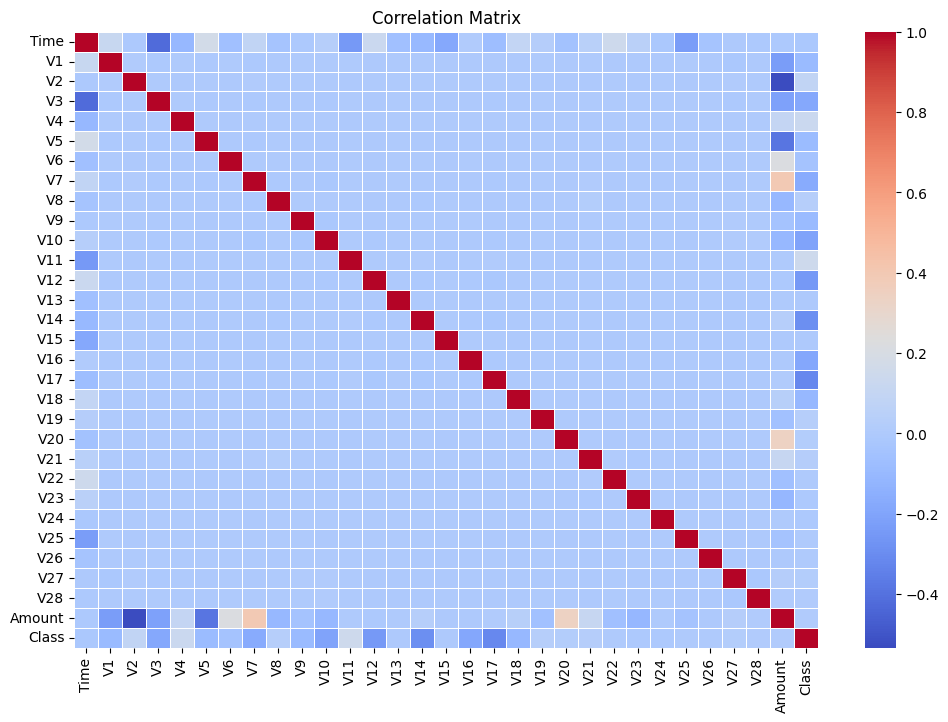

In [13]:
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Check top 10 correlated feature with class
correlation_target=corr['Class'].sort_values(ascending=False)
print(correlation_target.head(10))

Class    1.000000
V11      0.149067
V4       0.129326
V2       0.084624
V19      0.033631
V8       0.033068
V21      0.026357
V27      0.021892
V20      0.021486
V28      0.009682
Name: Class, dtype: float64


# Data Preprocessing

In [15]:
ss=StandardScaler()
df['Amount']=ss.fit_transform(df[['Amount']])

In [16]:
df=df.drop(['Time'],axis=1)

In [17]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [18]:
# Split the features and target
X=df.drop(labels='Class',axis=1)
Y=df[['Class']]

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [20]:
xtrain.shape

(226980, 29)

In [21]:
ytrain.shape

(226980, 1)

In [22]:
xtest.shape

(56746, 29)

In [23]:
ytest.shape

(56746, 1)

# Handeling imbalanced data - Undersampling

In [24]:
legit=df[df['Class']==0]
fraud=df[df['Class']==1]

In [25]:
legit.shape

(283253, 30)

In [26]:
fraud.shape

(473, 30)

In [27]:
legit_data=legit.sample(n=473)

In [28]:
legit_data.shape

(473, 30)

In [29]:
new_df=pd.concat([legit_data,fraud],ignore_index=True)

In [30]:
new_df['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [31]:
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.877733,-0.379822,-0.266981,0.672808,-0.666233,-0.666592,-0.491762,-0.232116,2.470694,-0.511360,0.159834,-1.897468,2.295164,1.337906,0.214315,0.255404,0.013029,0.533423,-0.584076,-0.099550,0.104291,0.607448,0.084006,-0.054986,-0.163830,-0.289367,-0.001692,-0.031076,-0.068901,0
1,2.046574,-1.221689,-0.028360,-0.705190,-1.288485,0.557410,-1.693206,0.376810,0.199284,1.033573,0.249710,-0.073888,-0.355555,-0.072094,0.870819,-0.139819,-0.959766,2.471495,-1.025602,-0.556615,-0.100467,0.138224,0.332606,0.259935,-0.734462,0.578806,0.006074,-0.036977,-0.269900,0
2,1.990957,-1.984952,-1.014321,-1.265569,-1.371786,0.034195,-1.117904,0.061933,-0.828024,1.486936,0.019678,-0.276683,-0.989358,-0.437502,-2.630940,-1.150289,0.996948,-0.176061,0.830309,-0.264835,-0.416109,-0.844353,0.244993,0.716250,-0.264875,-0.387468,-0.015237,-0.036681,0.197554,0
3,1.777778,-1.528864,-0.498993,-0.638975,-1.235035,-0.237420,-1.041372,-0.097961,1.165365,0.483841,1.610964,-2.485910,1.886084,1.191676,-0.810095,1.663973,0.353916,-0.037799,0.423514,0.336292,0.391791,0.965874,-0.070522,-0.350779,-0.284481,-0.124340,-0.050830,-0.031521,0.448593,0
4,-1.204258,1.853181,0.431124,2.658064,0.201141,-0.057135,0.707978,0.427897,-1.520064,0.642587,-1.468192,0.585999,1.305641,0.018164,-1.820347,1.185123,-0.911035,-0.904940,-1.818132,-0.474616,-0.241019,-0.879087,0.434229,-0.040481,-1.577752,-0.933638,-0.525092,-0.094625,-0.144300,0


In [32]:
X=new_df.drop(labels='Class',axis=1)
Y=new_df[['Class']]

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20,random_state=42)

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [35]:
model=lr.fit(xtrain,ytrain)

C:\Users\LAXMI NISHAD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

In [37]:
from sklearn.metrics import accuracy_score,classification_report,precision_score

In [38]:
tr_acc=accuracy_score(ytrain,tr_pred)
ts_acc=accuracy_score(ytest,ts_pred)
print('Training Accuracy Score :',tr_acc)
print('Testing Accuracy Score :',ts_acc)

Training Accuracy Score : 0.9470899470899471
Testing Accuracy Score : 0.9473684210526315


In [39]:
tr_result=classification_report(ytrain,tr_pred)
print(tr_result)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       385
           1       0.97      0.92      0.94       371

    accuracy                           0.95       756
   macro avg       0.95      0.95      0.95       756
weighted avg       0.95      0.95      0.95       756



In [40]:
ts_result=classification_report(ytest,ts_pred)
print(ts_result)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        88
           1       0.98      0.92      0.95       102

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190



# Random Forest Classier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc=RandomForestClassifier()

In [43]:
model=rfc.fit(xtrain,ytrain)

C:\Users\LAXMI NISHAD\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [44]:
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

In [45]:
tr_acc=accuracy_score(ytrain,tr_pred)
ts_acc=accuracy_score(ytest,ts_pred)
print('Training Accuracy Score :',tr_acc)
print('Testing Accuracy Score :',ts_acc)

Training Accuracy Score : 1.0
Testing Accuracy Score : 0.9473684210526315


In [46]:
tr_result=classification_report(ytrain,tr_pred)
print(tr_result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       385
           1       1.00      1.00      1.00       371

    accuracy                           1.00       756
   macro avg       1.00      1.00      1.00       756
weighted avg       1.00      1.00      1.00       756



In [47]:
ts_result=classification_report(ytest,ts_pred)
print(ts_result)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        88
           1       0.98      0.92      0.95       102

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190

